Gene-Sample Matrix size:  (40, 16248)
[8 7 4 2 0 4 1 4 3 6 6 5 4 7 5 3 1 7 4 4 3 3 5 5 1 1 9 8 6 9 9 1 4 4 9 2 9
 8 3 4]
Estimated number of clusters: 10
Estimated number of noise points: 0
Silhouette Coefficient: 0.028
Explained variation per principal component: [0.0726394  0.06937504 0.06464176]
   sample-name    pca-one    pca-two  pca-three
0        A2780   8.880449  68.533876 -52.337976
1       Caov-4  31.964531 -45.337868 -39.282896
2        DOV13 -31.971640 -10.657421  36.823835
3       EFO-21  54.591834  33.535340   7.351418
4       EFO-27 -27.052362 -11.203008  -9.558850
5         ES-2 -49.247360  25.830504  11.099759
6      FU-OV-1  -0.494900  -6.507208  -9.007801
7          Hey -59.829736  10.165358  28.709136
8      IGROV-1  21.062968  30.638341 -14.920922
9       JHOS-2  -4.731407 -43.409219  32.856701
10      JHOS-3  15.992581 -50.406163   3.793417
11      JHOS-4   8.038836 -55.815894 -25.881474
12         KGN -42.951212  -1.370083  29.123084
13   KURAMOCHI   8.869569 -4

<IPython.core.display.Javascript object>


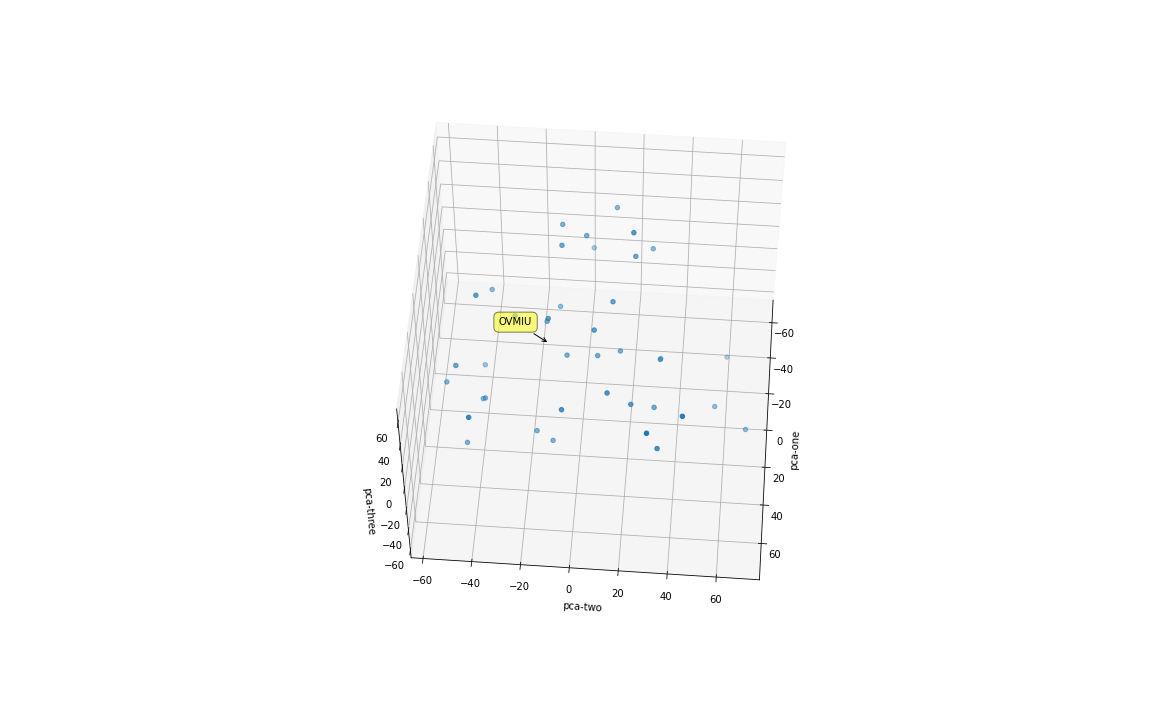

In [12]:
from numpy import split
from numpy.random import sample
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pdb


file = '/media/joso/WD-SSD/IRB/clustering_cell_lines_ovary/CosmicExpressionsOvary.csv'
df = pd.read_csv(file, sep=',')
cell_lines = df['SAMPLE_NAME'].unique().tolist()
genes = df['GENE_NAME'].unique().tolist()
sample_gene_matrix = df.pivot_table(index='SAMPLE_NAME', values='Z_SCORE', columns='GENE_NAME', aggfunc='mean')
sample_gene_matrix.to_csv('SampleGeneMatrix.csv')
print ('Gene-Sample Matrix size: ', sample_gene_matrix.shape)


from sklearn.cluster import DBSCAN
from sklearn import metrics

#db = DBSCAN(eps=150, min_samples=2).fit(sample_gene_matrix)
db = KMeans(n_clusters=10).fit(sample_gene_matrix)

labels = db.labels_
print (labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(sample_gene_matrix, labels))


# Dimensionality reduction using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(sample_gene_matrix.values)

df2 = pd.DataFrame()
df2['sample-name'] = sample_gene_matrix.index
df2['pca-one'] = pca_result[:,0]
df2['pca-two'] = pca_result[:,1] 
df2['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print (df2)
print (sample_gene_matrix.columns)

# Plot result
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
%matplotlib notebook

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(16,10))
#fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(
    xs=df2["pca-one"], 
    ys=df2["pca-two"], 
    zs=df2["pca-three"], 
    cmap='tab10',
    label=df2['sample-name']
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

# Displaying label on mouse hover
mplcursors.cursor().connect(
    "add", lambda sel: sel.annotation.set_text(df2['sample-name'][sel.target.index]))

#import pickle
#pickle.dump(ax, open('FigureObject.fig.pickle', 'wb'))
#pdb.set_trace()
import mpld3
#fig = plt.gcf()
#print (mpld3.fig_to_html(fig))



plt.show();







